In [19]:
import bg20
from bg20 import BristolGorilla2020

In [20]:
import pandas as pd

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from torch import optim

In [22]:
path = '../../BristolGorillas2020/images/train/'
data = '../preprocessing/bg2020_train.csv'

In [23]:
# Define relevant transformations inc. converting images to tensors
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize((50,50))
                               ])

In [24]:
dataset = pd.read_csv(data)

In [25]:
dataset.head()

,Unnamed: 0,file_name,annotation_file,image_path,annotation_path,annotation_0,annotation_1,annotation_2
0,0,ayana-1-img-1.jpg,ayana-1-img-1.txt,../../BristolGorillas2020/images/train/ayana/a...,../../BristolGorillas2020/images/train/ayana/a...,1 0.557292 0.212500 0.026042 0.036111,NaN,NaN
1,1,ayana-1-img-2.jpg,ayana-1-img-2.txt,../../BristolGorillas2020/images/train/ayana/a...,../../BristolGorillas2020/images/train/ayana/a...,1 0.914844 0.618981 0.167187 0.308333,NaN,NaN
2,2,ayana-1-img-3.jpg,ayana-1-img-3.txt,../../BristolGorillas2020/images/train/ayana/a...,../../BristolGorillas2020/images/train/ayana/a...,1 0.657031 0.431481 0.030729 0.079630,NaN,NaN
3,3,ayana-1-img-4.jpg,ayana-1-img-4.txt,../../BristolGorillas2020/images/train/ayana/a...,../../BristolGorillas2020/images/train/ayana/a...,1 0.473438 0.503241 0.023958 0.058333,NaN,NaN
4,4,ayana-1-img-5.jpg,ayana-1-img-5.txt,../../BristolGorillas2020/images/train/ayana/a...,../../BristolGorillas2020/images/train/ayana/a...,1 0.575521 0.295370 0.044792 0.083333,NaN,NaN


In [26]:
dataset.drop(columns=['annotation_1','annotation_2'],inplace=True)
dataset.dropna(inplace=True)

In [27]:
bristol_gorillas=BristolGorilla2020(path=path,dataset=dataset,transform=transform)

In [28]:
train_loader=DataLoader(dataset=bristol_gorillas,batch_size=10,shuffle=True)

In [29]:
img, label = next(iter(train_loader))

In [30]:
img.shape, label

(torch.Size([10, 3, 50, 50]), tensor([3, 1, 3, 2, 0, 5, 6, 2, 4, 6]))

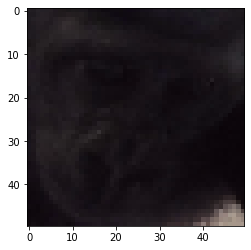

In [31]:
import matplotlib.pyplot as plt
plt.imshow(img[1].permute(1, 2, 0));

**Learn2learn**

In [35]:
import learn2learn as l2l

In [37]:
dataset = dataset[:100]

In [38]:
dataset = l2l.data.MetaDataset(BristolGorilla2020(path=path,dataset=dataset,transform=transform))

In [43]:
transforms = [  # Easy to define your own transform
    l2l.data.transforms.NWays(dataset, n=1),
    l2l.data.transforms.KShots(dataset, k=1),
    l2l.data.transforms.LoadData(dataset),
]
taskset = l2l.data.TaskDataset(dataset, transforms, num_tasks=10)
for task in taskset:
    X, y = task

In [45]:
X, y

(tensor([[[[0.1686, 0.1778, 0.1831,  ..., 0.3357, 0.3009, 0.2734],
           [0.1631, 0.1707, 0.1737,  ..., 0.3431, 0.3133, 0.2776],
           [0.1647, 0.1659, 0.1686,  ..., 0.3451, 0.3208, 0.2784],
           ...,
           [0.3494, 0.3494, 0.3431,  ..., 0.5333, 0.5451, 0.5698],
           [0.3664, 0.3725, 0.3639,  ..., 0.5114, 0.5379, 0.5840],
           [0.3635, 0.3825, 0.3753,  ..., 0.5051, 0.5296, 0.5557]],
 
          [[0.1380, 0.1472, 0.1541,  ..., 0.4831, 0.4821, 0.4951],
           [0.1357, 0.1432, 0.1463,  ..., 0.4773, 0.4828, 0.4875],
           [0.1373, 0.1384, 0.1412,  ..., 0.4686, 0.4800, 0.4788],
           ...,
           [0.2945, 0.2945, 0.2882,  ..., 0.4667, 0.4824, 0.5071],
           [0.3115, 0.3176, 0.3090,  ..., 0.4431, 0.4742, 0.5213],
           [0.3117, 0.3307, 0.3235,  ..., 0.4345, 0.4601, 0.4923]],
 
          [[0.1357, 0.1449, 0.1471,  ..., 0.4263, 0.4205, 0.4260],
           [0.1239, 0.1315, 0.1345,  ..., 0.4227, 0.4220, 0.4213],
           [0.1255, 0.12